In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

test_titanic = pd.read_csv('titanic.csv')
titanic = sns.load_dataset('titanic')

print("First 5 rows: \n", titanic.head(5).T, "\n\n")
print("Last 5 rows: \n", titanic.tail(5).T)

First 5 rows: 
                        0          1            2            3            4
survived               0          1            1            1            0
pclass                 3          1            3            1            3
sex                 male     female       female       female         male
age                 22.0       38.0         26.0         35.0         35.0
sibsp                  1          1            0            1            0
parch                  0          0            0            0            0
fare                7.25    71.2833        7.925         53.1         8.05
embarked               S          C            S            S            S
class              Third      First        Third        First        Third
who                  man      woman        woman        woman          man
adult_male          True      False        False        False         True
deck                 NaN          C          NaN            C          NaN
embark_to

In [3]:
print(titanic.dtypes)

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


In [4]:
print(titanic.info)

<bound method DataFrame.info of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_m

In [5]:
# Het aantal passagiers zijn 891 (rows)

In [6]:
print(titanic['class'], "\n\n")
print(titanic[['embark_town', 'alive', 'alone']])

0       Third
1       First
2       Third
3       First
4       Third
        ...  
886    Second
887     First
888     Third
889     First
890     Third
Name: class, Length: 891, dtype: category
Categories (3, object): ['First', 'Second', 'Third'] 


     embark_town alive  alone
0    Southampton    no  False
1      Cherbourg   yes  False
2    Southampton   yes   True
3    Southampton   yes  False
4    Southampton    no   True
..           ...   ...    ...
886  Southampton    no   True
887  Southampton   yes   True
888  Southampton    no  False
889    Cherbourg   yes   True
890   Queenstown    no   True

[891 rows x 3 columns]


In [7]:
# Om bepaalde rijen te selecteren

print(titanic.iloc[5:11])

    survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
5          0       3    male   NaN      0      0   8.4583        Q   Third   
6          0       1    male  54.0      0      0  51.8625        S   First   
7          0       3    male   2.0      3      1  21.0750        S   Third   
8          1       3  female  27.0      0      2  11.1333        S   Third   
9          1       2  female  14.0      1      0  30.0708        C  Second   
10         1       3  female   4.0      1      1  16.7000        S   Third   

      who  adult_male deck  embark_town alive  alone  
5     man        True  NaN   Queenstown    no   True  
6     man        True    E  Southampton    no   True  
7   child       False  NaN  Southampton    no  False  
8   woman       False  NaN  Southampton   yes  False  
9   child       False  NaN    Cherbourg   yes  False  
10  child       False    G  Southampton   yes  False  


In [8]:
# Opdracht 10: 10. Selecteer voor passagier 5 tot 10 de kolommen ‘survived’ en ‘age’ en print af.

print(titanic[['survived', 'age']].iloc[5:11])



    survived   age
5          0   NaN
6          0  54.0
7          0   2.0
8          1  27.0
9          1  14.0
10         1   4.0


In [9]:
mannen_list = titanic[titanic['sex'] == 'male']

print(mannen_list)

     survived  pclass   sex   age  sibsp  parch     fare embarked   class  \
0           0       3  male  22.0      1      0   7.2500        S   Third   
4           0       3  male  35.0      0      0   8.0500        S   Third   
5           0       3  male   NaN      0      0   8.4583        Q   Third   
6           0       1  male  54.0      0      0  51.8625        S   First   
7           0       3  male   2.0      3      1  21.0750        S   Third   
..        ...     ...   ...   ...    ...    ...      ...      ...     ...   
883         0       2  male  28.0      0      0  10.5000        S  Second   
884         0       3  male  25.0      0      0   7.0500        S   Third   
886         0       2  male  27.0      0      0  13.0000        S  Second   
889         1       1  male  26.0      0      0  30.0000        C   First   
890         0       3  male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        T

In [10]:

print(titanic['sex'].value_counts())

male      577
female    314
Name: sex, dtype: int64


In [11]:
# Hoeveel mannen reisden in eerste klasse? Oefening 12

mannen_eerste = titanic[titanic['class'] == 'First']

print(mannen_eerste['sex'].value_counts())



male      122
female     94
Name: sex, dtype: int64


In [12]:
# Oefening 13: Bepaal het percentage mannen / vrouwen in deze dataset

print(titanic['sex'].value_counts(normalize=True))

male      0.647587
female    0.352413
Name: sex, dtype: float64


In [13]:
#Oefening 14: Bereken het aantal personen per embark town

print(titanic['embark_town'].value_counts())

# where embark town = null
print(titanic['embark_town'].isnull())

#Het aantal lege rijen per feature

print(titanic['embark_town'].isnull().sum())


Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64
0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: embark_town, Length: 891, dtype: bool
2


In [14]:
print(titanic.describe())

#Oefening 15: The describe() method returns description of the data in the DataFrame. 
#If the DataFrame contains numerical data, the description contains these information for each column

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [15]:
#Oefening 16: NaN is also included, en andere data die niet specifiek numeriek is
print(titanic.describe(include='all'))


          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare embarked  class  who adult_male deck  embark_town alive  \
count   8

In [16]:
# Oefening 17: 
print(titanic['fare'].mean())

print(titanic['fare'].median())

print(titanic['fare'].min())

print(titanic['fare'].max())

print(titanic['fare'].var())

print(titanic['fare'].std())

print(titanic['fare'].quantile(.25))

print(titanic['fare'].quantile(.5))

print(titanic['fare'].quantile(.75))

# Kan je deze waarden ook berekenen voor alle andere variabelen: Nee, want sommige waarden zijn niet numeriek, 
# en sommigge waarden zoals class zou hebben maar twee waarden. 

32.2042079685746
14.4542
0.0
512.3292
2469.436845743117
49.693428597180905
7.9104
14.4542
31.0


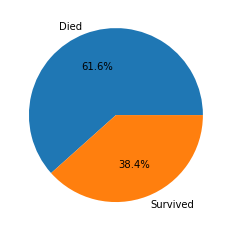

In [17]:
# Oefening 18

mylabels = ["Died", "Survived"]
plt.pie(titanic['survived'].value_counts(), labels = mylabels, autopct='%1.1f%%')

plt.show() 

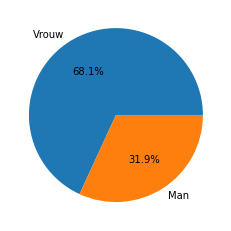

In [18]:
# Oefening 19: Survived per geslacht 

mannen_survived = titanic[titanic['survived'] == 1]
mylabels = ["Vrouw", "Man"]

plt.pie(mannen_survived['sex'].value_counts(), labels = mylabels, autopct='%1.1f%%')
plt.show()




<AxesSubplot:>

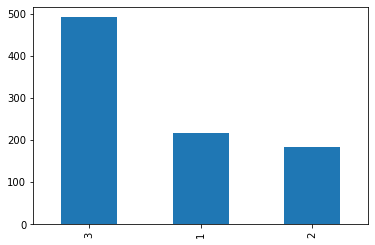

In [19]:
# Oefening 20: Bar diagram

titanic["pclass"].value_counts().plot(kind = 'bar')


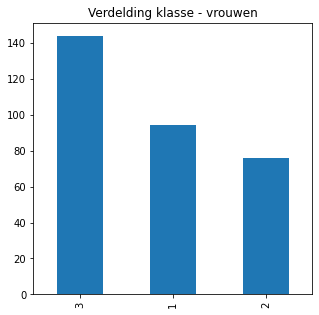

In [20]:
# Oefening 21: PClass per geslacht 
# Maak een staafdiagram per geslacht van de variabele ‘pclass’.

vrouwen = titanic[titanic.sex == 'female']
bar_data_vrouwen = vrouwen.pclass.value_counts()
bar_plot_vrouwen = bar_data_vrouwen.plot.bar(title = 'Verdelding klasse - vrouwen', figsize=(5,5))


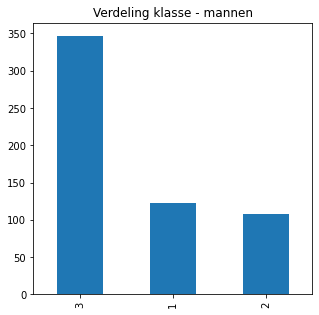

In [21]:
#Oef21 -mannen

mannen = titanic[titanic.sex == 'male']
bar_data_mannen = mannen.pclass.value_counts()
bar_plot_mannen = bar_data_mannen.plot.bar(title = 'Verdeling klasse - mannen', figsize=(5,5))

<AxesSubplot:title={'center':'aantal passagiers per klasse en geslacht'}, xlabel='sex'>

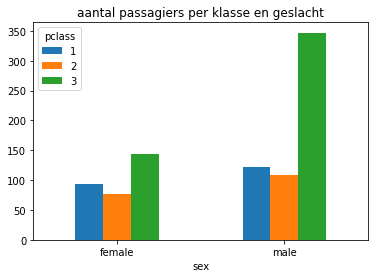

In [22]:
#Opgave 21
import pandas as pd
pd.crosstab(titanic.sex, titanic.pclass).plot(kind = 'bar', rot = 0, title = 'aantal passagiers per klasse en geslacht')

<AxesSubplot:title={'center':'histogram voor leeftijd'}, ylabel='Frequency'>

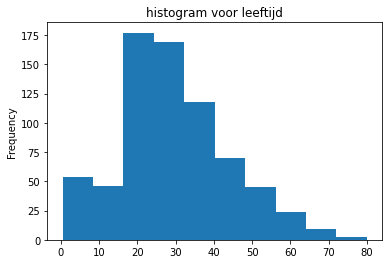

In [23]:
#Opgave 22
titanic.age.plot(kind = 'hist', title = 'histogram voor leeftijd')

<AxesSubplot:title={'center':'histogram voor prijs'}, ylabel='Frequency'>

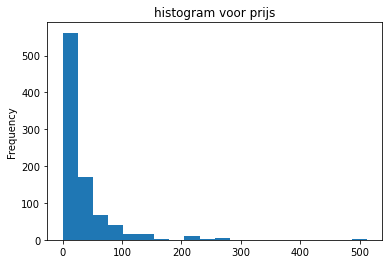

In [24]:
titanic.fare.plot(kind = 'hist', title = 'histogram voor prijs', bins = 20)

In [25]:
#Opgave 24

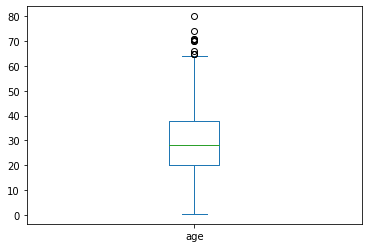

In [26]:
#Opgave 25
titanic.age.plot(kind='box')
plt.show()

<AxesSubplot:title={'center':'age'}, xlabel='pclass'>

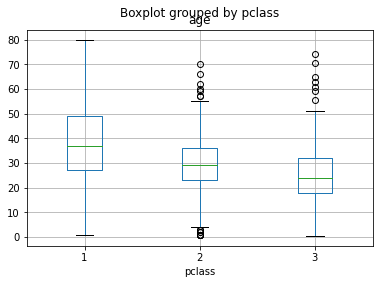

In [27]:
#Opgave 26
titanic[titanic.pclass.notnull()].boxplot('age', 'pclass')

In [28]:
#Opgave 28
#pd.crosstab(titanic.pclass, titanic.sex, margins = True)
pd.crosstab(titanic.pclass, titanic.sex, margins = True, normalize = True)

sex,female,male,All
pclass,,,
1,0.105499,0.136925,0.242424
2,0.085297,0.121212,0.206510
3,0.161616,0.389450,0.551066
All,0.352413,0.647587,1.000000


In [29]:
#Oefening 29
titanic.pivot_table(index = 'sex', columns = 'pclass', values = 'age', aggfunc = 'mean')

pclass,1,2,3
sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


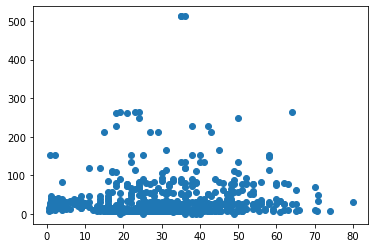

In [31]:
#Oefening 30: Maak een scatterplot (scatter van malplotlib) van de variabelen “age” en “fare”
plt.scatter(titanic.age, titanic.fare)

<AxesSubplot:>

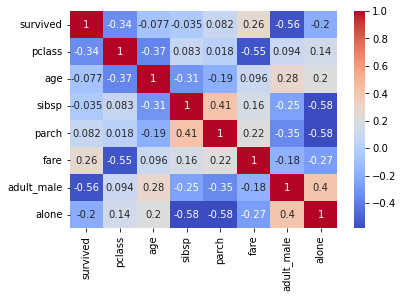

In [32]:
#Oefening 31 Maak een heatmap in python die correlaties weergeeft tussen de features van de titanic – dataset

sns.heatmap(titanic.corr(), annot = True, cmap = "coolwarm")

In [33]:
#Oefening 32
titanic.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [34]:
#Opgave32
#we bekijken deze rijen die een missing value hebben voor embarked
titanic[titanic.embarked.isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [35]:
#OPgave 34:
titanic.embarked.value_counts() 

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [36]:
#Opgave 35:
pd.crosstab(titanic.survived, titanic.embarked)

embarked,C,Q,S
survived,,,
0,75,47,427
1,93,30,217


In [37]:
#Opgave36
titanic.groupby(['pclass', 'embarked']).fare.median()

pclass  embarked
1       C           78.2667
        Q           90.0000
        S           52.0000
2       C           24.0000
        Q           12.3500
        S           13.5000
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: fare, dtype: float64

In [38]:
#Opgave 37
titanic.loc[titanic.embarked.isnull(), 'embarked'] = 'C'
titanic[titanic.embarked.isnull()]  # controle: geen null rijen meer voor de feature embarked

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [39]:
#Opgave 38: aantal missing values voor age: 177 rijen met een missing value voor age (zie ook vraag 14 / 7)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [40]:
titanic.loc[titanic['age'].isnull()].sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
126,0,3,male,NaN,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
82,1,3,female,NaN,0,0,7.7875,Q,Third,woman,False,NaN,Queenstown,yes,True
593,0,3,female,NaN,0,2,7.7500,Q,Third,woman,False,NaN,Queenstown,no,False
680,0,3,female,NaN,0,0,8.1375,Q,Third,woman,False,NaN,Queenstown,no,True
760,0,3,male,NaN,0,0,14.5000,S,Third,man,True,NaN,Southampton,no,True
451,0,3,male,NaN,1,0,19.9667,S,Third,man,True,NaN,Southampton,no,False
384,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
589,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
792,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
643,1,3,male,NaN,0,0,56.4958,S,Third,man,True,NaN,Southampton,yes,True


<AxesSubplot:ylabel='Frequency'>

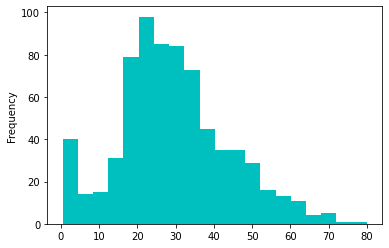

In [41]:
#Opgave 39:
titanic.age.plot(kind='hist', bins=20, color='c')

In [42]:
#Opgave 39
titanic.age.mean()

29.69911764705882

In [43]:
#Opgave 39
print(titanic.age.median())
print(titanic.age.max())
print(titanic.age.min())

28.0
80.0
0.42


In [44]:
#Opgave 39
titanic.groupby(['sex']).age.median()

sex
female    27.0
male      29.0
Name: age, dtype: float64

<AxesSubplot:title={'center':'age'}, xlabel='sex'>

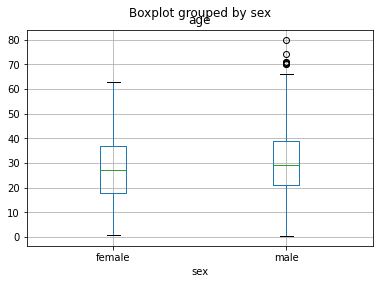

In [45]:
#Opgave 39
titanic[titanic.age.notnull()].boxplot('age', 'sex')

<AxesSubplot:title={'center':'age'}, xlabel='pclass'>

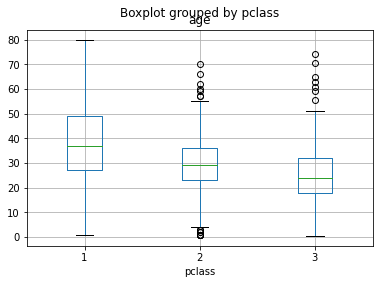

In [46]:
#Opgave 40
titanic[titanic.age.notnull()].boxplot('age','pclass')

In [47]:
#Opgave 41
pclass_age_median = titanic.groupby('pclass').age.transform('median')
print(pclass_age_median)
titanic.age.fillna(pclass_age_median, inplace=True)

0      24.0
1      37.0
2      24.0
3      37.0
4      24.0
       ... 
886    29.0
887    37.0
888    24.0
889    37.0
890    24.0
Name: age, Length: 891, dtype: float64


In [48]:
#Opgave 42
#controle of er nog missing values zijn
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
#Opgave 43: Dit zijn waarden die buiten de limieten van de data-set liggen. 

<AxesSubplot:title={'center':'histogram voor ticketprijs'}, ylabel='Frequency'>

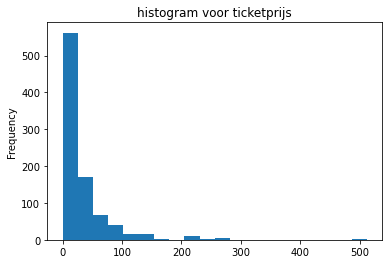

In [49]:
titanic.fare.plot(kind='hist', title='histogram voor ticketprijs', bins=20)

<AxesSubplot:title={'center':'boxplot voor ticketprijs'}>

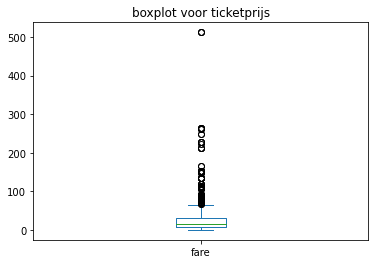

In [50]:
titanic.fare.plot(kind='box', title='boxplot voor ticketprijs')

In [51]:
#Opgave 46
titanic.loc[titanic.fare == titanic.fare.max()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True


In [52]:
#Opgave 48

#Opgave 48
#binning
pd.qcut(titanic.fare, 4)

0       (-0.001, 7.91]
1      (31.0, 512.329]
2       (7.91, 14.454]
3      (31.0, 512.329]
4       (7.91, 14.454]
            ...       
886     (7.91, 14.454]
887     (14.454, 31.0]
888     (14.454, 31.0]
889     (14.454, 31.0]
890     (-0.001, 7.91]
Name: fare, Length: 891, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [53]:
#Opgave 48
pd.qcut(titanic.fare, 4, labels = ['zeer laag', 'laag', 'hoog', 'zeer hoog'])

0      zeer laag
1      zeer hoog
2           laag
3      zeer hoog
4           laag
         ...    
886         laag
887         hoog
888         hoog
889         hoog
890    zeer laag
Name: fare, Length: 891, dtype: category
Categories (4, object): ['zeer laag' < 'laag' < 'hoog' < 'zeer hoog']

<AxesSubplot:>

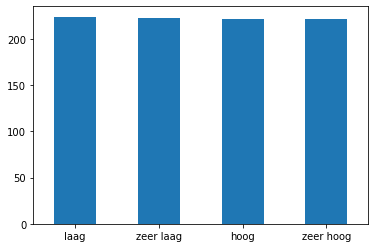

In [54]:
#Opgave 49
pd.qcut(titanic.fare, 4, labels = ['zeer laag', 'laag', 'hoog', 'zeer hoog']).value_counts().plot(kind = 'bar', rot=0)

In [56]:
#Opgave 50
#tot slot maken we een extra feature (kolom) in onze titanic dataset met deze categorieën
titanic['fare_category'] = pd.qcut(titanic.fare, 4, labels=['zeer laag', 'laag', 'hoog', 'zeer hoog'])

In [57]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   survived       891 non-null    int64   
 1   pclass         891 non-null    int64   
 2   sex            891 non-null    object  
 3   age            891 non-null    float64 
 4   sibsp          891 non-null    int64   
 5   parch          891 non-null    int64   
 6   fare           891 non-null    float64 
 7   embarked       891 non-null    object  
 8   class          891 non-null    category
 9   who            891 non-null    object  
 10  adult_male     891 non-null    bool    
 11  deck           203 non-null    category
 12  embark_town    889 non-null    object  
 13  alive          891 non-null    object  
 14  alone          891 non-null    bool    
 15  fare_category  891 non-null    category
dtypes: bool(2), category(3), float64(2), int64(4), object(5)
memory usage: 81.7+ KB


<AxesSubplot:title={'center':'histogram voor fare'}, ylabel='Frequency'>

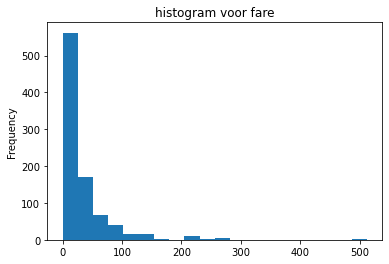

In [58]:
#Opgave 51
titanic.fare.plot(kind = 'hist', title = 'histogram voor fare', bins = 20)


(-30.0, 250.0)

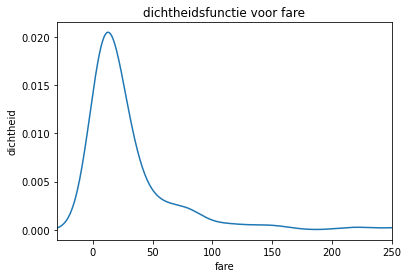

In [59]:
titanic.fare.plot(kind = 'kde', title = 'dichtheidsfunctie voor fare') # hier wordt onderliggend van een norm verdeling uitgegaan
plt.xlabel("fare")
plt.ylabel("dichtheid")
ax = plt.gca() #Get the Current Axes
ax.set_xlim(-30, 250)

In [60]:
#Opgave 53
titanic.fare.skew()

4.787316519674893

<AxesSubplot:title={'center':'histogram voor leeftijd'}, ylabel='Frequency'>

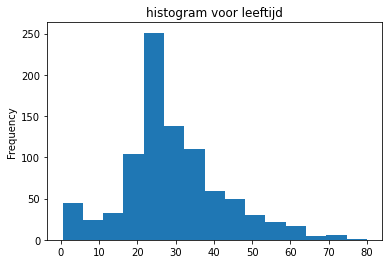

In [61]:
#Opgave 54: histogram voor variabele leeftijd
titanic.age.plot(kind = 'hist', title = 'histogram voor leeftijd', bins = 15)

<AxesSubplot:title={'center':'dichtheidsfunctie voor age'}, ylabel='Density'>

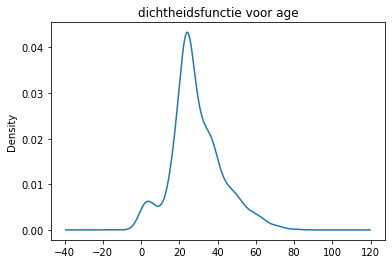

In [62]:
#Opgave 55: dichtheidsfunctie voor de variabele 'age'
titanic.age.plot(kind = 'kde', title = 'dichtheidsfunctie voor age')

In [63]:
#Opgave 56: skewness parameter voor 'age
titanic.age.skew()

0.548255729646475

In [64]:
#Opgave 57
print(titanic.age.mean())
print(titanic.age.std())

29.06640852974186
13.244531842087222


In [65]:
#Opgave 58:
stats.norm.cdf(30, titanic.age.mean(), titanic.age.std()) - stats.norm.cdf(20, titanic.age.mean(), titanic.age.std())

0.28128050355814804

In [67]:
#Opgave 59: TEST opgave 58 op steekproefgegevens
titanic_leeftijd20_leeftijd30 = titanic[(titanic.age >= 20) & (titanic.age <= 30)]
print(len(titanic_leeftijd20_leeftijd30))

392
